# Small WACCM-X

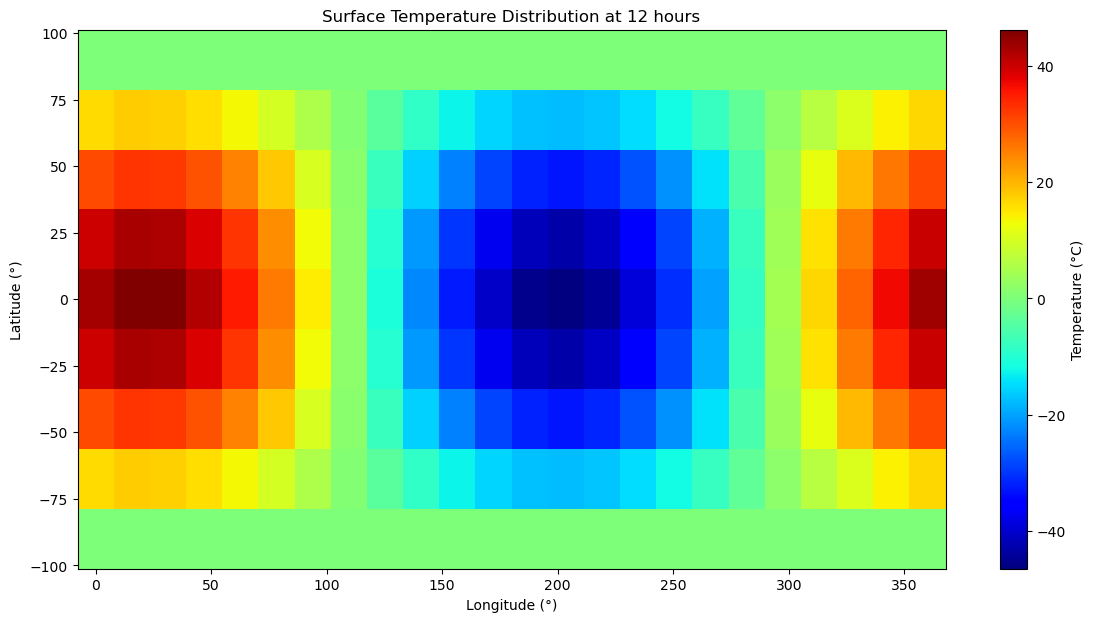

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
C = 0.1  # Cooling constant
S_max = 10  # Maximum solar radiation
duration = 24  # hours
dt = 0.1  # Time step in hours
latitudes = np.linspace(-90, 90, 9)  # Latitude bands from pole to pole
longitudes = np.linspace(0, 360, 24)  # Longitude bands around the globe
n_layers = 3  # Number of vertical layers
advection_coefficient = 0.01  # Horizontal advection coefficient

# Initialize arrays
times = np.arange(0, duration, dt)
temperatures = np.zeros((len(times), len(latitudes), len(longitudes), n_layers))
solar_radiation = np.zeros_like(temperatures)

# Solar radiation variation with latitude and longitude
for i, lat in enumerate(latitudes):
    for k, lon in enumerate(longitudes):
        solar_radiation[:, i, k, :] = (S_max * np.sin(np.pi * (times - lon/15) / 12) * np.cos(np.radians(lat))).reshape(-1, 1)

# Model simulation with added longitude dimension
for t in range(1, len(times)):
    for i in range(len(latitudes)):
        for k in range(len(longitudes)):
            for j in range(n_layers):
                # Horizontal advection (only for longitudes)
                advection = 0
                if k > 0:
                    advection -= advection_coefficient * (temperatures[t-1, i, k, j] - temperatures[t-1, i, k-1, j])
                if k < len(longitudes) - 1:
                    advection += advection_coefficient * (temperatures[t-1, i, k+1, j] - temperatures[t-1, i, k, j])
                
                # Radiative and cooling effects
                dT = (solar_radiation[t, i, k, j] - C * temperatures[t-1, i, k, j] + advection) * dt
                
                # Temperature decreases with altitude
                dT *= (1 - 0.1 * j)
                
                temperatures[t, i, k, j] = temperatures[t-1, i, k, j] + dT

# Extract temperature data for a specific time (e.g., 12 hours) and the surface layer
temperature_distribution = temperatures[int(12/dt), :, :, 0]

# Plotting temperature distribution on a lon*lat grid
plt.figure(figsize=(14, 7))
c = plt.pcolormesh(longitudes, latitudes, temperature_distribution, shading='auto', cmap='jet')
plt.colorbar(c, label='Temperature (°C)')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Surface Temperature Distribution at 12 hours')
plt.show()


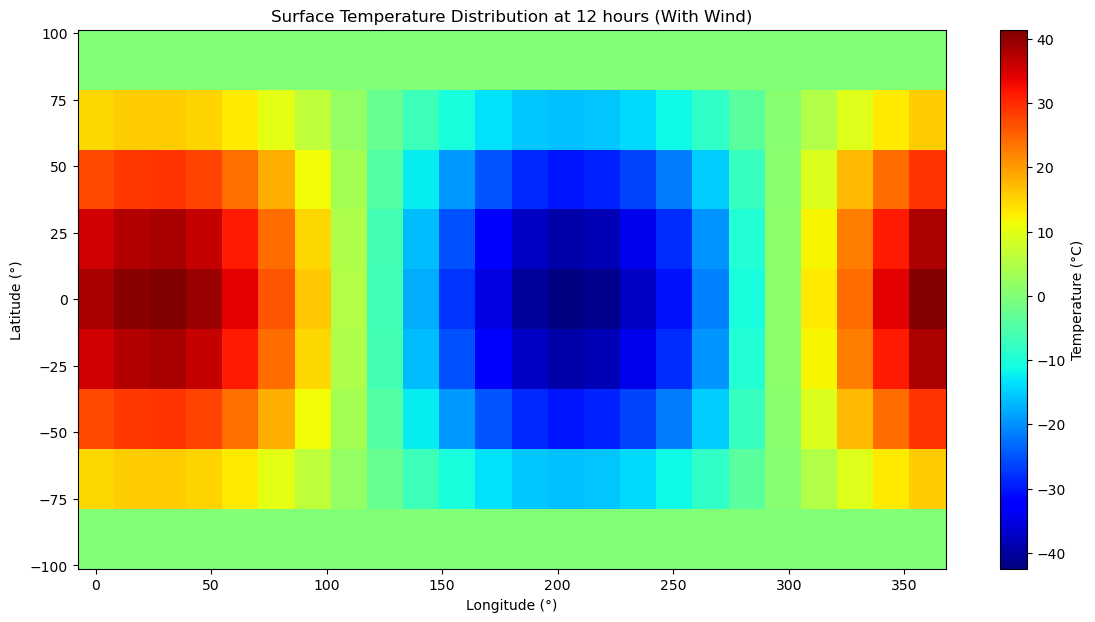

In [3]:
# Model parameters for wind
U = 5.0  # Constant eastward wind speed (arbitrary units for simplicity)

# Model simulation with zonal wind advection
for t in range(1, len(times)):
    for i in range(len(latitudes)):
        for k in range(len(longitudes)):
            for j in range(n_layers):
                # Horizontal advection (zonal and meridional)
                advection_zonal = 0
                advection_meridional = 0
                
                # Zonal advection
                if k > 0:
                    dT_dx = (temperatures[t-1, i, k, j] - temperatures[t-1, i, k-1, j]) / (longitudes[1] - longitudes[0])
                    advection_zonal -= U * dT_dx
                
                if k < len(longitudes) - 1:
                    dT_dx = (temperatures[t-1, i, k+1, j] - temperatures[t-1, i, k, j]) / (longitudes[1] - longitudes[0])
                    advection_zonal += U * dT_dx
                
                # Radiative, cooling, and advection effects
                dT = (solar_radiation[t, i, k, j] - C * temperatures[t-1, i, k, j] + advection_zonal + advection_meridional) * dt
                
                # Temperature decreases with altitude
                dT *= (1 - 0.1 * j)
                
                temperatures[t, i, k, j] = temperatures[t-1, i, k, j] + dT

# Extract temperature data for a specific time (e.g., 12 hours) and the surface layer
temperature_distribution_wind = temperatures[int(12/dt), :, :, 0]

# Plotting temperature distribution on a lon*lat grid with wind
plt.figure(figsize=(14, 7))
c = plt.pcolormesh(longitudes, latitudes, temperature_distribution_wind, shading='auto', cmap='jet')
plt.colorbar(c, label='Temperature (°C)')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Surface Temperature Distribution at 12 hours (With Wind)')
plt.show()


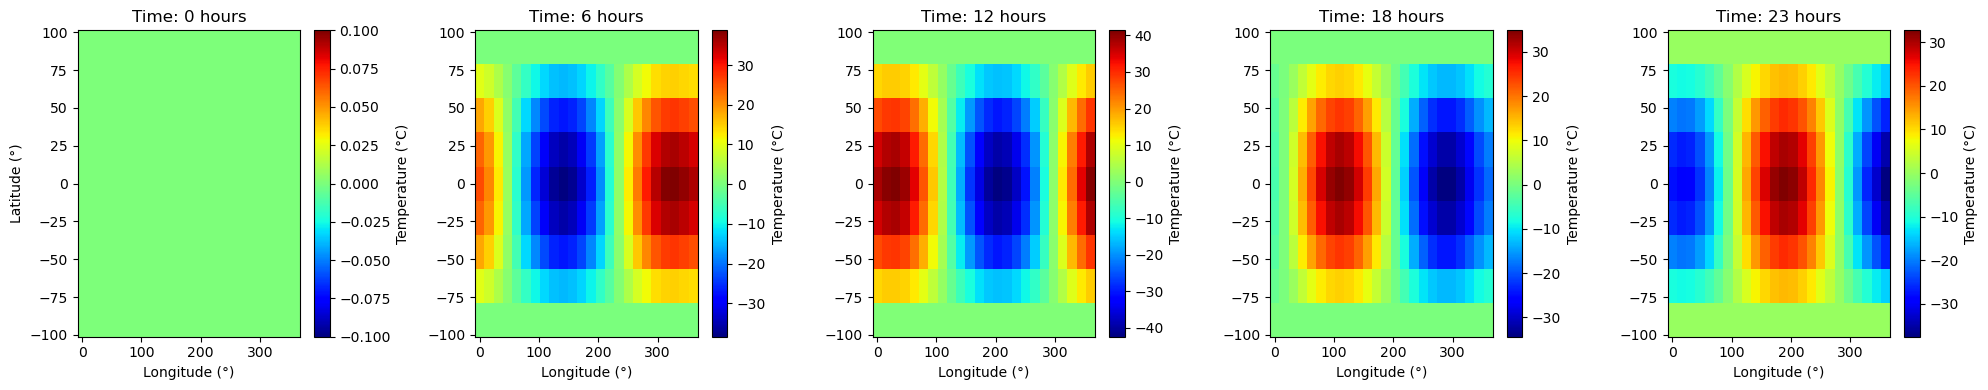

In [11]:
# Selected time points for subplots
time_points = [0, 6, 12, 18, 23]
n_subplots = len(time_points)

fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(20, 4))

for i, time_point in enumerate(time_points):
    ax = axes[i]
    c = ax.pcolormesh(longitudes, latitudes, temperatures[int(time_point/dt), :, :, 0], shading='auto', cmap='jet')
    ax.set_title(f'Time: {time_point} hours')
    ax.set_xlabel('Longitude (°)')
    if i == 0:
        ax.set_ylabel('Latitude (°)')
    fig.colorbar(c, ax=ax, label='Temperature (°C)')

plt.tight_layout()
plt.show()


## Updated Wind field

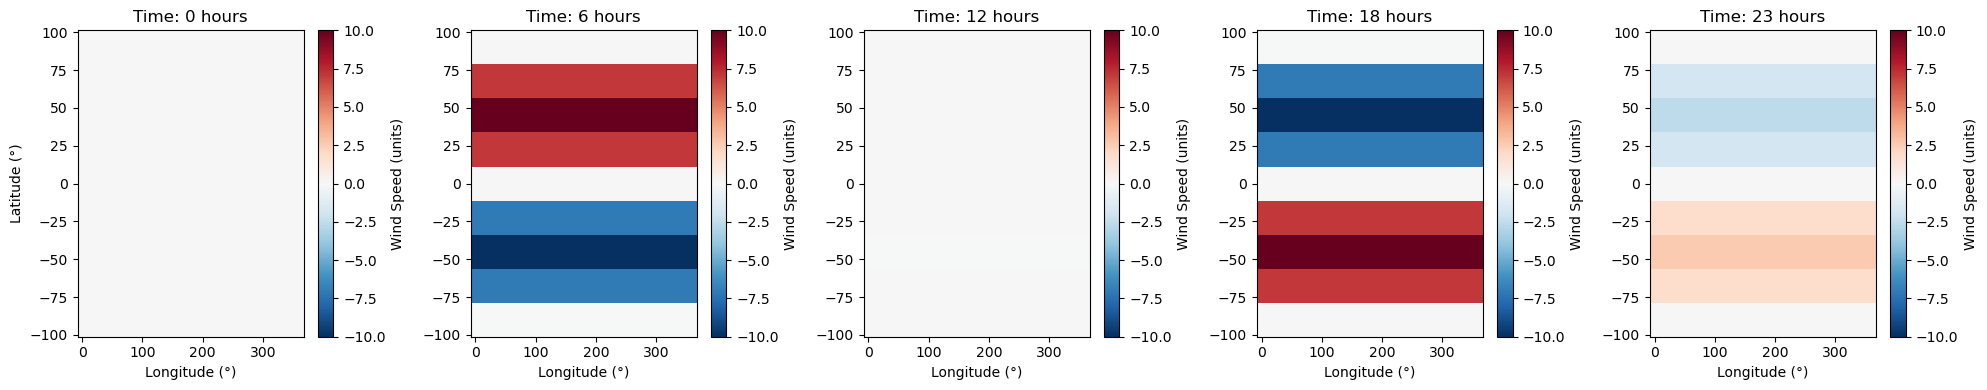

In [13]:
# Model parameters for the new wind field
U_0 = 10.0  # Maximum wind speed (scaling factor)

# Compute the wind field
wind_field = np.zeros((len(times), len(latitudes), len(longitudes)))
for t, time in enumerate(times):
    for i, lat in enumerate(latitudes):
        for k, lon in enumerate(longitudes):
            wind_field[t, i, k] = U_0 * np.sin(np.pi * lat / 90) * np.sin(2 * np.pi * time / 24)

# Plotting wind field for selected time points
time_points = [0, 6, 12, 18, 23]
n_subplots = len(time_points)

fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(20, 4))

for i, time_point in enumerate(time_points):
    ax = axes[i]
    c = ax.pcolormesh(longitudes, latitudes, wind_field[int(time_point/dt), :, :], shading='auto', cmap='RdBu_r', vmin=-U_0, vmax=U_0)
    ax.set_title(f'Time: {time_point} hours')
    ax.set_xlabel('Longitude (°)')
    if i == 0:
        ax.set_ylabel('Latitude (°)')
    fig.colorbar(c, ax=ax, label='Wind Speed (units)')

plt.tight_layout()
plt.show()


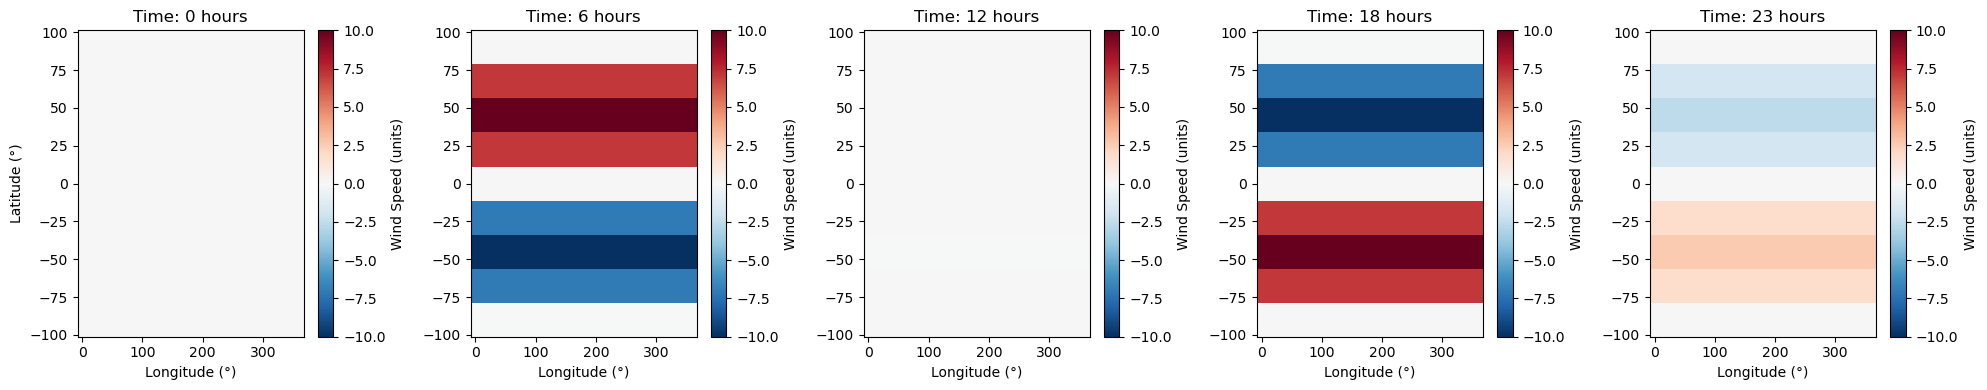

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters from previous sections
C = 0.1  # Cooling constant
S_max = 10  # Maximum solar radiation
duration = 24  # hours
dt = 0.1  # Time step in hours
latitudes = np.linspace(-90, 90, 9)  # Latitude bands from pole to pole
longitudes = np.linspace(0, 360, 24)  # Longitude bands around the globe
n_layers = 3  # Number of vertical layers
advection_coefficient = 0.01  # Horizontal advection coefficient
times = np.arange(0, duration, dt)

# Model parameters for the new wind field
U_0 = 10.0  # Maximum wind speed (scaling factor)

# Compute the wind field
wind_field = np.zeros((len(times), len(latitudes), len(longitudes)))
for t, time in enumerate(times):
    for i, lat in enumerate(latitudes):
        for k, lon in enumerate(longitudes):
            wind_field[t, i, k] = U_0 * np.sin(np.pi * lat / 90) * np.sin(2 * np.pi * time / 24)

# Plotting wind field for selected time points
time_points = [0, 6, 12, 18, 23]
n_subplots = len(time_points)

fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(20, 4))

for i, time_point in enumerate(time_points):
    ax = axes[i]
    c = ax.pcolormesh(longitudes, latitudes, wind_field[int(time_point/dt), :, :], shading='auto', cmap='RdBu_r', vmin=-U_0, vmax=U_0)
    ax.set_title(f'Time: {time_point} hours')
    ax.set_xlabel('Longitude (°)')
    if i == 0:
        ax.set_ylabel('Latitude (°)')
    fig.colorbar(c, ax=ax, label='Wind Speed (units)')

plt.tight_layout()
plt.show()


## Updated temperature field

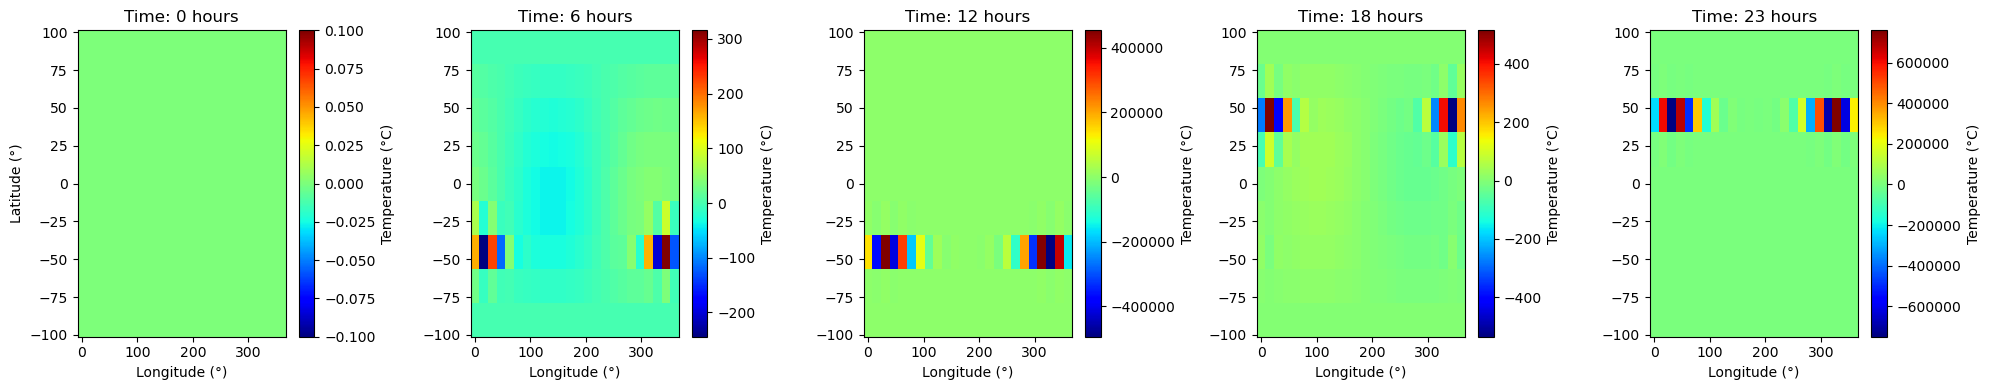

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Reinitialize model parameters
C = 0.1  # Cooling constant
S_max = 10  # Maximum solar radiation
duration = 24  # hours
dt = 0.1  # Time step in hours
latitudes = np.linspace(-90, 90, 9)  # Latitude bands from pole to pole
longitudes = np.linspace(0, 360, 24)  # Longitude bands around the globe
n_layers = 3  # Number of vertical layers
advection_coefficient = 0.01  # Horizontal advection coefficient
times = np.arange(0, duration, dt)
U_0 = 10.0  # Maximum wind speed (scaling factor)

# Compute the wind field
wind_field = np.zeros((len(times), len(latitudes), len(longitudes)))
for t, time in enumerate(times):
    for i, lat in enumerate(latitudes):
        for k, lon in enumerate(longitudes):
            wind_field[t, i, k] = U_0 * np.sin(np.pi * lat / 90) * np.sin(2 * np.pi * time / 24)

# Model simulation with the new wind-driven advection
temperatures = np.zeros((len(times), len(latitudes), len(longitudes), n_layers))
solar_radiation = np.zeros_like(temperatures)

for i, lat in enumerate(latitudes):
    for k, lon in enumerate(longitudes):
        solar_radiation[:, i, k, :] = (S_max * np.sin(np.pi * (times - lon/15) / 12) * np.cos(np.radians(lat))).reshape(-1, 1)

for t in range(1, len(times)):
    for i in range(len(latitudes)):
        for k in range(len(longitudes)):
            for j in range(n_layers):
                advection_zonal = 0
                if k > 0:
                    dT_dx = (temperatures[t-1, i, k, j] - temperatures[t-1, i, k-1, j]) / (longitudes[1] - longitudes[0])
                    advection_zonal -= wind_field[t, i, k] * dT_dx
                if k < len(longitudes) - 1:
                    dT_dx = (temperatures[t-1, i, k+1, j] - temperatures[t-1, i, k, j]) / (longitudes[1] - longitudes[0])
                    advection_zonal += wind_field[t, i, k] * dT_dx
                dT = (solar_radiation[t, i, k, j] - C * temperatures[t-1, i, k, j] + advection_zonal) * dt
                dT *= (1 - 0.1 * j)
                temperatures[t, i, k, j] = temperatures[t-1, i, k, j] + dT

# Plotting temperature distribution for selected time points
time_points = [0, 6, 12, 18, 23]
n_subplots = len(time_points)
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(20, 4))

for i, time_point in enumerate(time_points):
    ax = axes[i]
    c = ax.pcolormesh(longitudes, latitudes, temperatures[int(time_point/dt), :, :, 0], shading='auto', cmap='jet')
    ax.set_title(f'Time: {time_point} hours')
    ax.set_xlabel('Longitude (°)')
    if i == 0:
        ax.set_ylabel('Latitude (°)')
    fig.colorbar(c, ax=ax, label='Temperature (°C)')

plt.tight_layout()
plt.show()


### here you made a mistake: temperature at 0 hr should not be the constant.
1. maybe you can try to start from the temperature distribution in your 24-hr model output.
2. make temperature at 0-hr more smooth. it seems your output is non-physical because there is no such high or such low temperature on Earth, and i think you should take in consideration of the big wind change to the temperature.

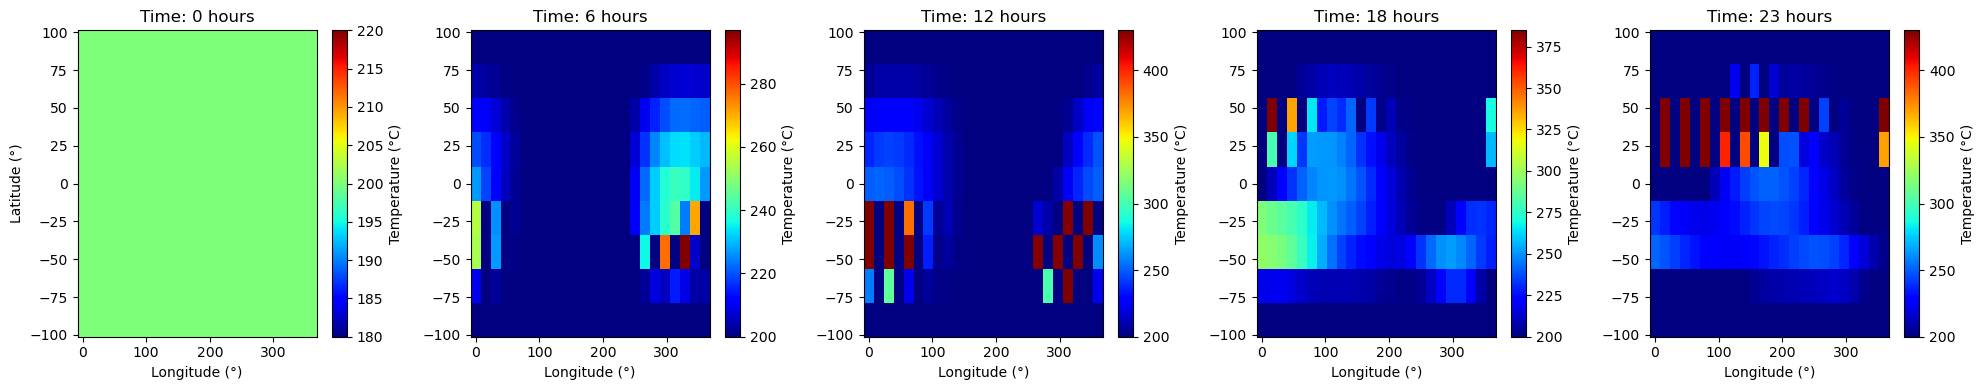

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Model parameters
C = 0.01  # Cooling constant
S_max = 10  # Maximum solar radiation
duration = 24  # hours
dt = 0.1  # Time step in hours
latitudes = np.linspace(-90, 90, 9)  # Latitude bands from pole to pole
longitudes = np.linspace(0, 360, 24)  # Longitude bands around the globe
n_layers = 3  # Number of vertical layers
U_0 = 10.0  # Maximum wind speed (scaling factor)
times = np.arange(0, duration, dt)

# Compute the wind field
wind_field = np.zeros((len(times), len(latitudes), len(longitudes)))
for t, time in enumerate(times):
    for i, lat in enumerate(latitudes):
        for k, lon in enumerate(longitudes):
            wind_field[t, i, k] = U_0 * np.sin(np.pi * lat / 90) * np.sin(2 * np.pi * time / 24)

# Initialize temperatures and solar radiation
temperatures = np.zeros((len(times), len(latitudes), len(longitudes), n_layers))
solar_radiation = np.zeros_like(temperatures)
for i, lat in enumerate(latitudes):
    for k, lon in enumerate(longitudes):
        solar_radiation[:, i, k, :] = (S_max * np.sin(np.pi * (times - lon/15) / 12) * np.cos(np.radians(lat))).reshape(-1, 1)

# Adjust the initial smoothed temperature distribution to ensure it's within the constraints
smoothed_temperature = gaussian_filter(temperatures[int(24/dt) - 1, :, :, 0], sigma=1)
temperatures[0, :, :, 0] = np.clip(smoothed_temperature, 200, 430)

# Model simulation
for t in range(1, len(times)):
    for i in range(len(latitudes)):
        for k in range(len(longitudes)):
            for j in range(n_layers):
                advection_zonal = 0
                if k > 0:
                    dT_dx = (temperatures[t-1, i, k, j] - temperatures[t-1, i, k-1, j]) / (longitudes[1] - longitudes[0])
                    advection_zonal -= wind_field[t, i, k] * dT_dx
                if k < len(longitudes) - 1:
                    dT_dx = (temperatures[t-1, i, k+1, j] - temperatures[t-1, i, k, j]) / (longitudes[1] - longitudes[0])
                    advection_zonal += wind_field[t, i, k] * dT_dx
                dT = (solar_radiation[t, i, k, j] - C * temperatures[t-1, i, k, j] + advection_zonal) * dt
                dT *= (1 - 0.1 * j)
                new_temp = temperatures[t-1, i, k, j] + dT
                new_temp = max(200, min(new_temp, 430))
                temperatures[t, i, k, j] = new_temp

# Plotting temperature distribution for selected time points
time_points = [0, 6, 12, 18, 23]
n_subplots = len(time_points)
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(20, 4))
for i, time_point in enumerate(time_points):
    ax = axes[i]
    c = ax.pcolormesh(longitudes, latitudes, temperatures[int(time_point/dt), :, :, 0], shading='auto', cmap='jet')
    ax.set_title(f'Time: {time_point} hours')
    ax.set_xlabel('Longitude (°)')
    if i == 0:
        ax.set_ylabel('Latitude (°)')
    fig.colorbar(c, ax=ax, label='Temperature (°C)')
plt.tight_layout()
plt.show()


# backup